# <font color = 'brown'>  CREDIT EDA CASE STUDY </font>

   ## APPLICATION_DATA
   
   This data is about whether a client has payment difficulties.

### READING THE DATASET

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the dataset from local

application_df = pd.read_csv("application_data.csv")

In [4]:
#Determining the shape of the dataset

application_df.shape

(307511, 122)

In [5]:
#Identifying the variables dtypes

application_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## Data Cleaning and Manipulation
 

In [6]:
#Checking null values in the data frame

application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
#Identifying the columns having more than 30% of null values

nullColumns = application_df.isnull().sum()
nullColumns = nullColumns[nullColumns.values > (0.3*len(nullColumns))]
len(nullColumns)

64

**There are 64 columns in which there are more than 30% of null values. These will impact our analysis. We can drop this columns for better results.**

In [8]:
#Removing the columns having more than 30% of null values

application_df.drop(labels=list(nullColumns.index),axis=1,inplace=True)

application_df.shape


(307511, 58)

In [9]:
#Checking the existence of null values in the remaining data frame

application_df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

**"AMT_ANNUITY" column has few null values, hence we try to impute them with the suitable value.**

In [10]:
application_df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

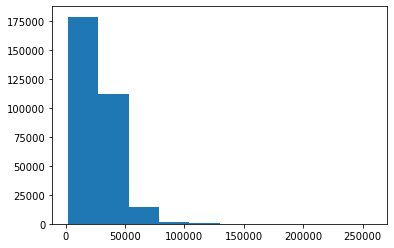

In [11]:
#plotting histogram for AMT_ANNUITY column

plt.hist(application_df.AMT_ANNUITY)
plt.show()

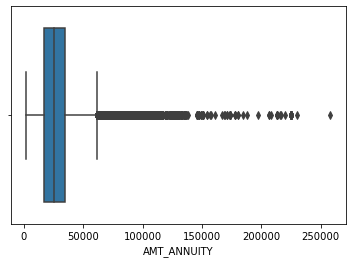

In [12]:
#plotting boxplot to identify outliers

sns.boxplot(application_df.AMT_ANNUITY)
plt.show()

**Since "AMT_ANNUITY" column is having an outlier which is very large, imputing missing values with mean will be inappropriate.**
**Hence,Median comes to rescue for this and we will fill those missing values with median value.**

In [13]:
#calculating median and replace null values with median

medianValue = application_df.AMT_ANNUITY.median()
application_df.loc[application_df['AMT_ANNUITY'].isnull(), 'AMT_ANNUITY'] = medianValue

In [14]:
#Checking the existence of null values in the remaining data frame(in percentages)

application_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [15]:
#reading the column names
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG

In [16]:
#we will drop unwanted columns from the data frame for better analysis

canDrop = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 
       'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
       'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_df.drop(labels=canDrop,axis=1,inplace=True)

application_df.shape

(307511, 28)

### **CHECKING  THE DATATYPE OF  THE  COLUMN**

In [17]:
application_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

**Verifying if the object type columns are of correct, if these columns are incorrect we will fix them first before our analysis**

In [18]:
#NAME_CONTRACT_TYPE

application_df.NAME_CONTRACT_TYPE.head(10)

0         Cash loans
1         Cash loans
2    Revolving loans
3         Cash loans
4         Cash loans
5         Cash loans
6         Cash loans
7         Cash loans
8         Cash loans
9    Revolving loans
Name: NAME_CONTRACT_TYPE, dtype: object

In [19]:
#CODE_GENDER 

application_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**There are XNA values in 4 columns which means they are not available. Since there are more Female we can impute them with "F", this will not have any impact on our analysis.**


In [20]:
# Updating the column 'CODE_GENDER' with "F" in the dataframe

application_df.loc[application_df['CODE_GENDER']=='XNA', 'CODE_GENDER']='F'
application_df['CODE_GENDER'].value_counts()



F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [21]:
application_df.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

**18% values in the "ORGANIZATION_TYPE" column has XNA values, we can drop these rows from the dataframe causing no impact on analysis**

In [22]:
#Dropping XNA rows for data frame in ORGANIZATION_TYPE column

application_df = application_df[~(application_df.ORGANIZATION_TYPE == "XNA")]

In [23]:
application_df.shape

(252137, 28)

In [24]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [25]:
#typecasting all the int/float variables to numeric in the dataset

toNumeric = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                 'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED',
                 'DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_df[toNumeric] = application_df[toNumeric].apply(pd.to_numeric)

In [26]:
application_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,-477,WEDNESDAY,16,0,0,0,0,0,0,Other
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,-619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,-2379,MONDAY,16,0,0,0,0,1,1,Other
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,-3992,THURSDAY,8,0,0,0,0,0,0,Electricity
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,-738,SATURDAY,15,0,0,0,0,0,0,Medicine


**Since we have cleaned the data set and handled the missing values, we will start our analysis**


### **BINNING THE  CATEGORICAL  VALUE**

**Lets start with categorising based on annual income**

In [27]:
#Creating bins for "AMT_INCOME_TOTAL"

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000]
xlabels = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000',
           '250000-300000','300000-350000','350000-400000','400000-450000',
           '450000-500000','500000 and Above']
application_df['AMT_INCOME_RANGE'] = pd.cut(application_df['AMT_INCOME_TOTAL'], bins, labels=xlabels)

In [28]:
#Creating bins for "AMT_CREDIT"

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
xlabels = ['0-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000',
           '600000-700000','700000-800000','800000-900000','900000 and Above']
application_df['AMT_CREDIT_RANGE'] = pd.cut(application_df['AMT_CREDIT'],bins=bins,labels=xlabels)

In [29]:
# Dividing the dataset into two datasets consisting of 
#target=1 : client with payment difficulties 
#target=0 : others

application_df_target1 = application_df.loc[application_df["TARGET"] == 1]
application_df_target0 = application_df.loc[application_df["TARGET"] == 0]

In [30]:
print("Target 1 shape : ",application_df_target1.shape)
print("Target 0 shape : ",application_df_target0.shape)

Target 1 shape :  (21835, 30)
Target 0 shape :  (230302, 30)


**There are less clients with payment difficulties(21835) compared to others(230302)**

### **FINDING THE  IMBALANCE  RATIO**

In [31]:
# Calculating Imbalance percentage    
# Since the majority is target0 and minority is target1

print ("The Data Imbalance ratio is:",round(len(application_df_target0)/len(application_df_target1),2))

The Data Imbalance ratio is: 10.55


## Categorical Univariate Analysis  - Target 0

In [32]:
# Common method to plot Count plot

def countPlotForUnivariateAnalysis(df,col,title,hue =None):
    
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 20
    
    
    tempCol = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=90)
    plt.yscale('log') #using log scale to capture better analysis
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index, hue = hue) 
        
    plt.show()



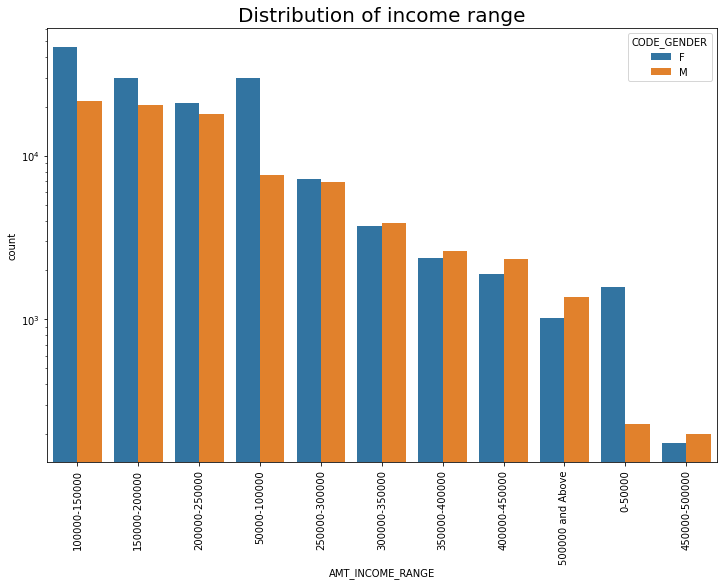

In [33]:
# PLotting for income range

countPlotForUnivariateAnalysis(application_df_target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


### **Insights from the above graph**



1.   Income range from 100000 to 150000 is having more number of credits.
2.   Credit rating for females are more than male
3.    For 450000 and above count is very less compared to others


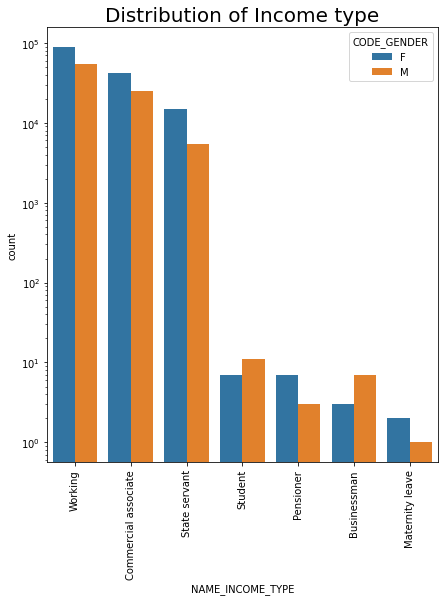

In [34]:
# Plotting for Income type

countPlotForUnivariateAnalysis(application_df_target0,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')



### **Insights from above graph**



1.   Working professionals have the highest numbers
2.   Those who are on Maternity leave are least in numbers
3.   Those who are employeed in one way or the other have better results



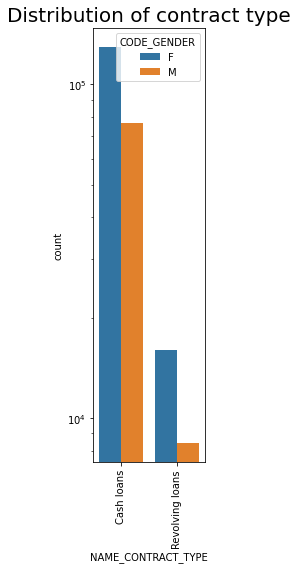

In [35]:
# Plotting for Contract type

countPlotForUnivariateAnalysis(application_df_target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')



### **Insights from above graph**

 1.Cash loans contracts have more credit rating than the revolving loans.
 
 2.For this, also Female is leading for applying credits.




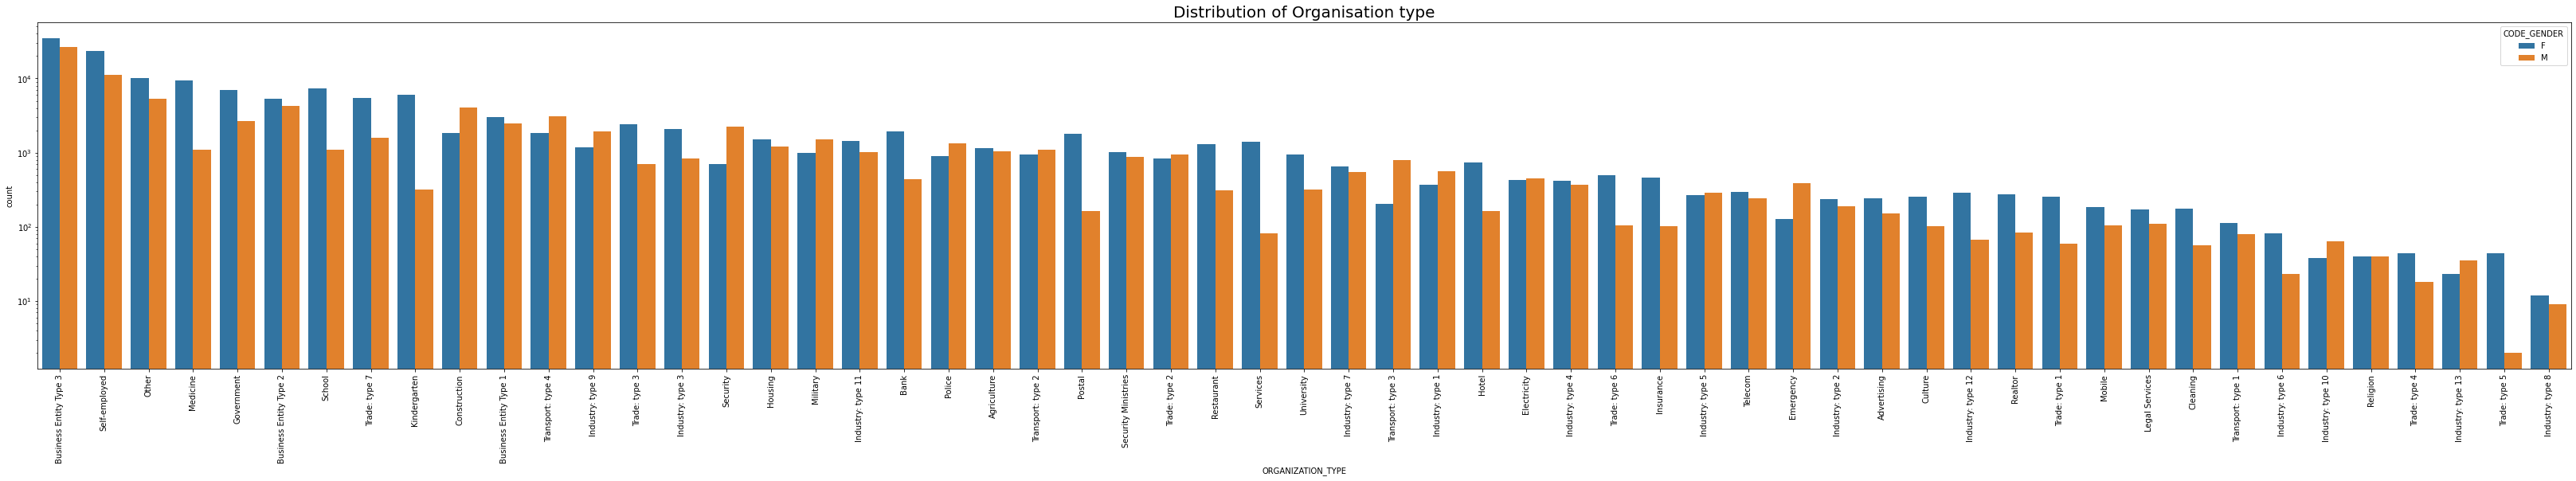

In [36]:
# Plotting for Organization type

countPlotForUnivariateAnalysis(application_df_target0,col='ORGANIZATION_TYPE',title='Distribution of Organisation type',hue='CODE_GENDER')


**Since it is difficult to intrepret from the above graph we will create a graph for Organization type separately.**



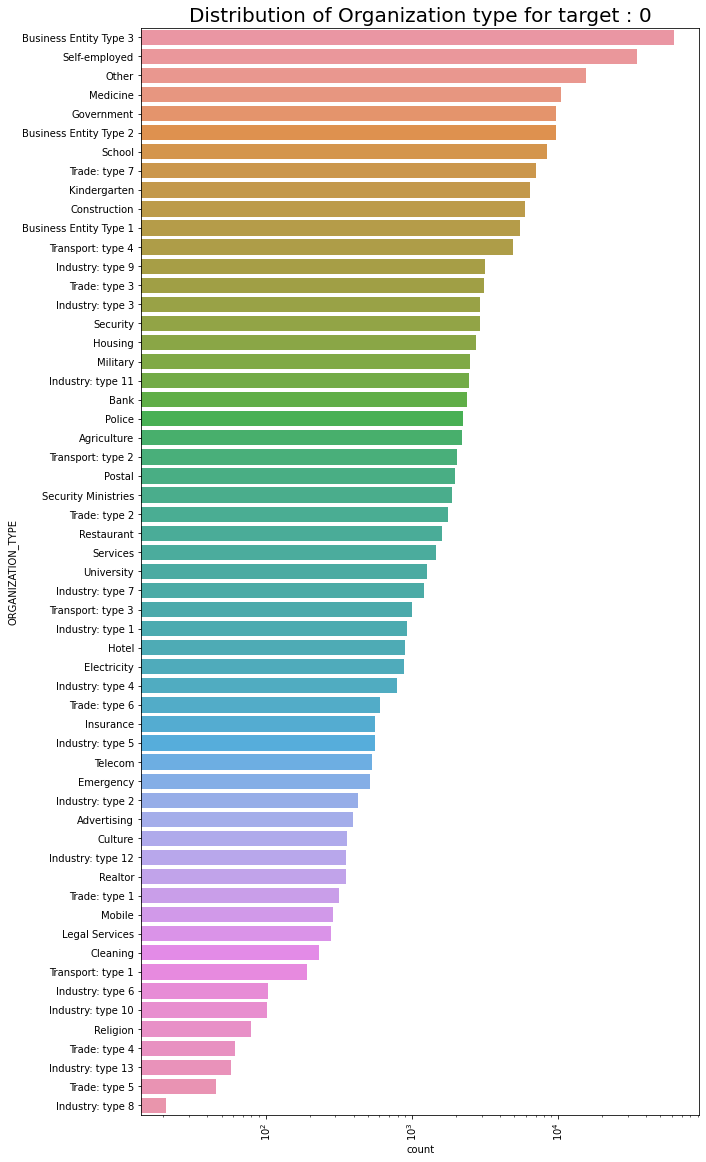

In [37]:
plt.figure(figsize=(10,20))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 20
plt.title("Distribution of Organization type for target : 0")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=application_df_target0,y='ORGANIZATION_TYPE',order=application_df_target0['ORGANIZATION_TYPE'].value_counts().index)
    
plt.show()

###  **Insights from above graph**



1.   ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ org types have applied for more credits compared to others
2.   There are few clients from 'Industry type 8', 'Trade type 5'



## Categorical Univariate Analysis - Target 1

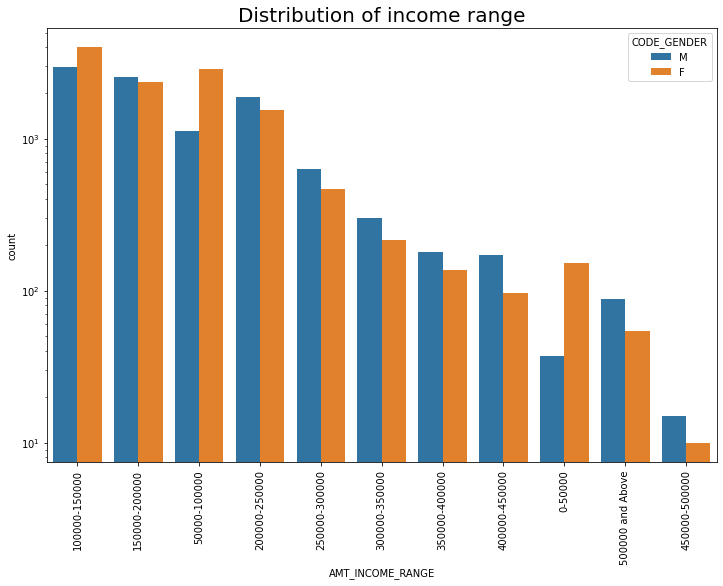

In [38]:
# PLotting for income range

countPlotForUnivariateAnalysis(application_df_target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


###  **Insights from above graph**

1. Female counts are higher than male.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.

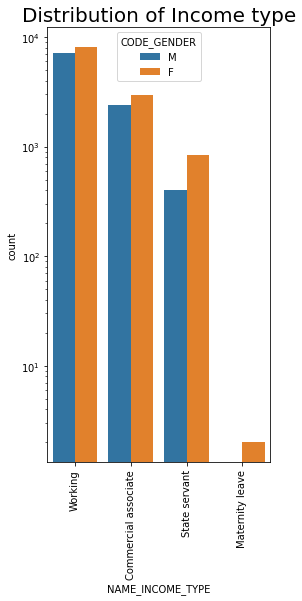

In [39]:
# Plotting for Income type

countPlotForUnivariateAnalysis(application_df_target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')



###  **Insights from above graph**

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. The Females are having more  number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘business person’ and ‘Maternity leave’.



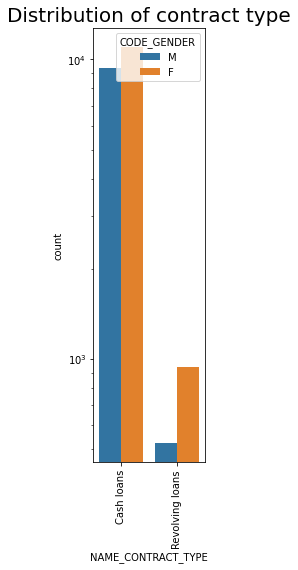

In [40]:
# Plotting for Contract type

countPlotForUnivariateAnalysis(application_df_target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')



###  **Insights from above graph**

1. For contract type ‘cash loans’ is having a higher number of credits than ‘Revolving loans’ contract type.
2. For this reason, women are also leading the way in applying for credits.
3. For type 1: there are only Female Revolving loans.



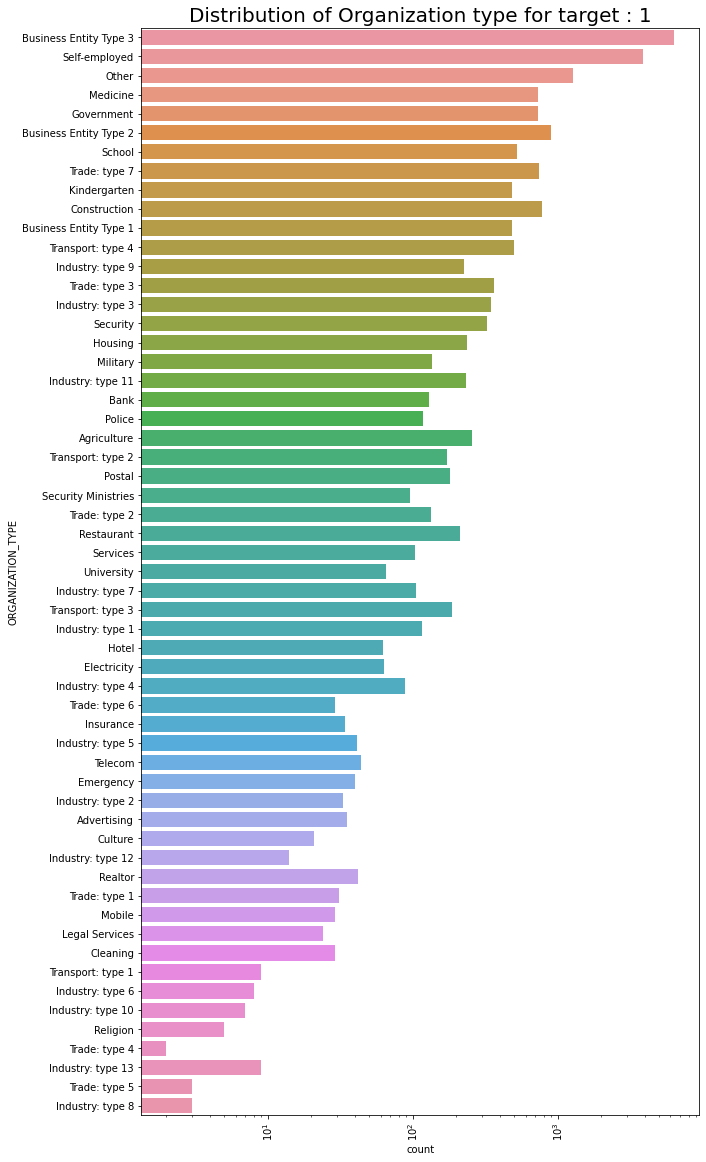

In [41]:
plt.figure(figsize=(10,20))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 20
plt.title("Distribution of Organization type for target : 1")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=application_df_target1,y='ORGANIZATION_TYPE',order=application_df_target0['ORGANIZATION_TYPE'].value_counts().index)
    
plt.show()

###  **Insights from above graph**

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
3. Same as type 0 in distribution of organization type.

**Bivariate analysis - **Target 0****

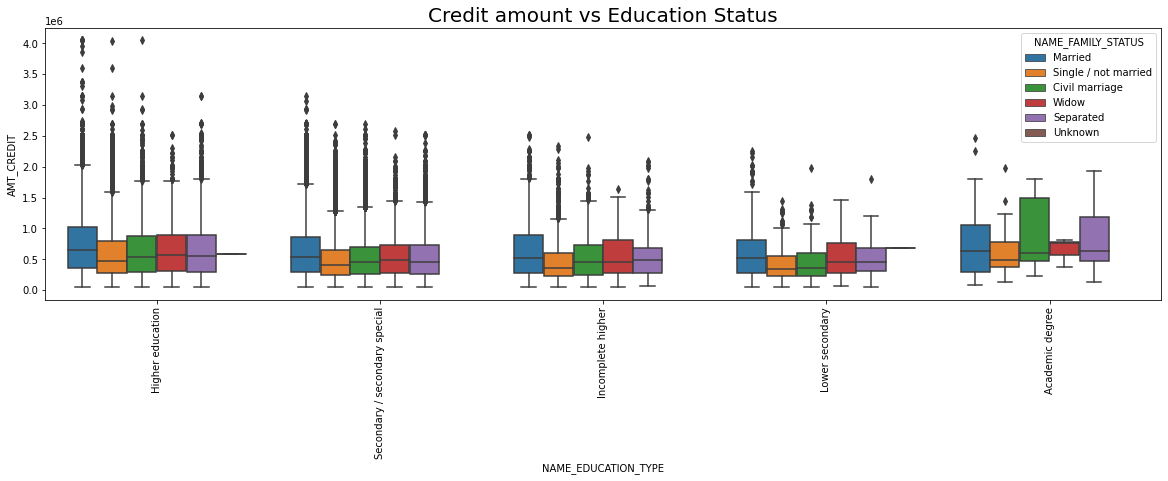

In [42]:
# Box plotting for Credit amount

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(data = application_df_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()


###  **Insights from above graph**

From the above box plot we are able to conclude that Family status of 'civil marriage', 'marriage' and 'separated' of academic degree education are having higher number of credits than others.
Also, education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for educational degree is having most of the credits within the third quartile.

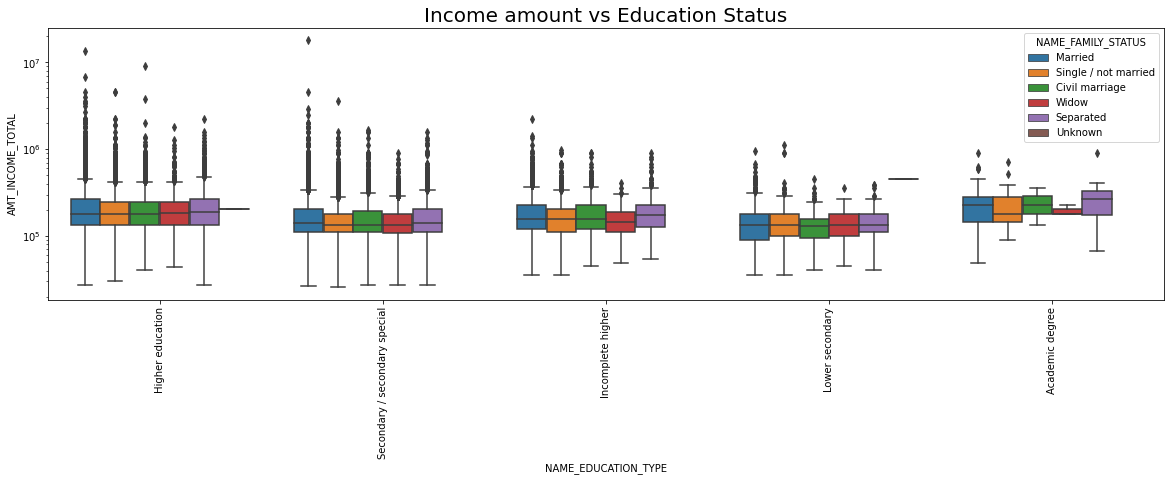

In [43]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data = application_df_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

###  **Insights from above graph**

From above boxplot for Education type 'Higher education' the income amount is usually equal with family status. It does contain many outliers. Less outlier are having for academic degree but there income amount is little higher that higher education.
Lower secondary of marriage family status are have less income amount than others.


**Bivariate analysis - **Target 1****

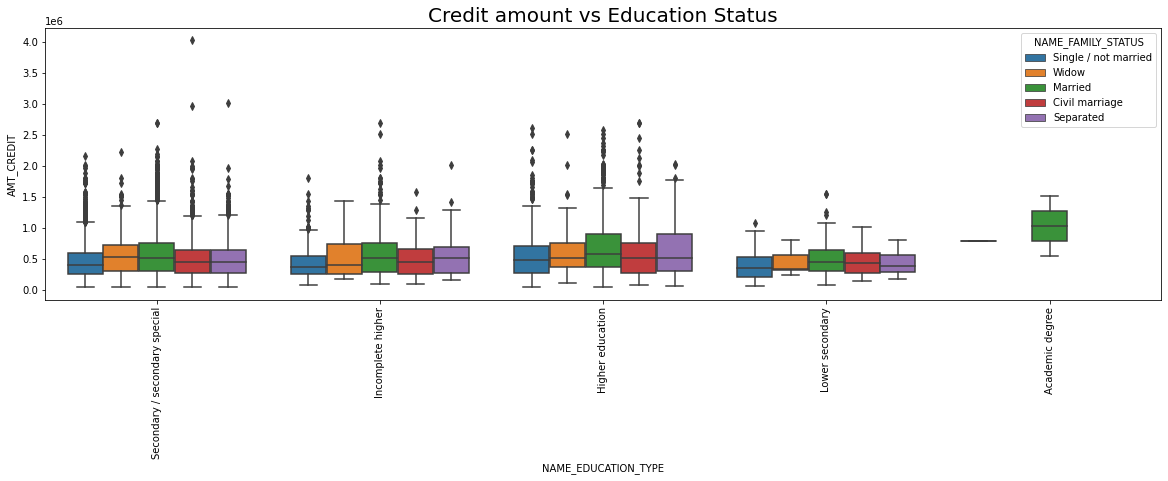

In [44]:
# Box plotting for Credit amount

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(data = application_df_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()


###  **Insights from above graph**


From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for academic degree is having most of the credits in the third quartile.

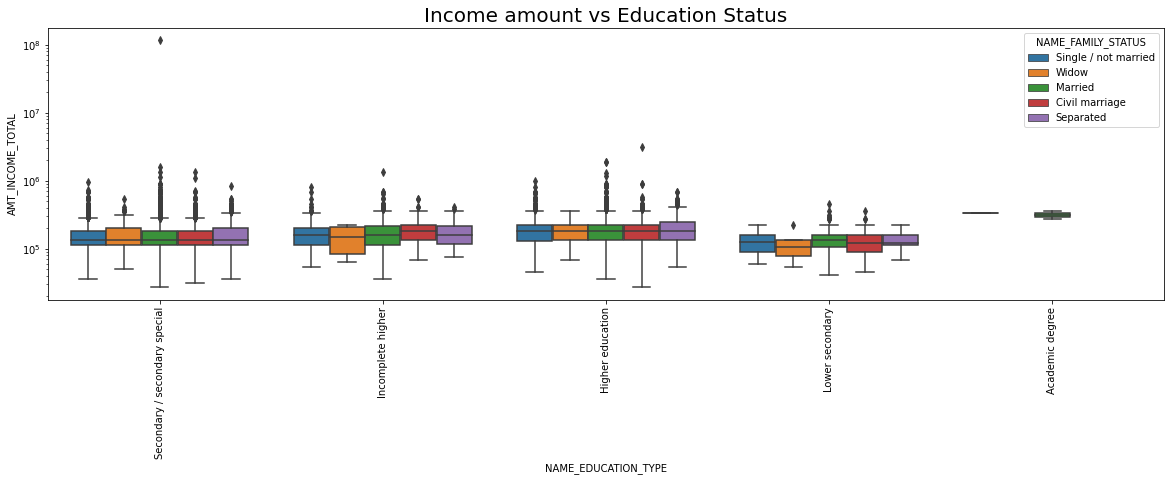

In [45]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data = application_df_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

###  **Insights from above graph**


From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.

   ## CORRELATION  FOR  THE  CLIENT  WITH  PAYMENT  DIFFICULTIES  AND  ALL OTHER 

In [46]:
#Find correlation between the numerical columns for Target 0 

application_df_target0_corr = application_df_target0.iloc[0:,2:]
target0=application_df_target0_corr.corr()
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,-0.030352,0.242462,0.063036,0.162900,-0.117746,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,0.169306,-0.045543,-0.030102,0.034508,-0.026462,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,0.103876,-0.152659,-0.087500,-0.015180,-0.034914,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,0.122206,-0.091571,-0.052470,0.009814,-0.025990,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268
REGION_POPULATION_RELATIVE,-0.030352,0.169306,0.103876,0.122206,1.000000,-0.041138,0.008663,-0.059696,-0.004014,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033
DAYS_BIRTH,0.242462,-0.045543,-0.152659,-0.091571,-0.041138,1.000000,0.352662,0.299000,0.108050,0.048619,0.058344,0.039298,0.014175,0.165505,0.112517,0.031121
DAYS_EMPLOYED,0.063036,-0.030102,-0.087500,-0.052470,0.008663,0.352662,1.000000,0.172102,0.086679,0.022200,0.056714,0.082435,0.063205,0.112019,0.125791,0.074665
DAYS_REGISTRATION,0.162900,0.034508,-0.015180,0.009814,-0.059696,0.299000,0.172102,1.000000,0.029895,-0.031501,0.020549,0.017588,0.009254,0.047235,0.055274,0.031350
DAYS_ID_PUBLISH,-0.117746,-0.026462,-0.034914,-0.025990,-0.004014,0.108050,0.086679,0.029895,1.000000,0.005436,0.026744,0.020968,0.008941,0.053424,0.033071,0.001767
HOUR_APPR_PROCESS_START,-0.033031,0.055934,0.040390,0.034038,0.174754,0.048619,0.022200,-0.031501,0.005436,1.000000,0.055041,0.072118,0.057690,0.010767,-0.001460,-0.005077


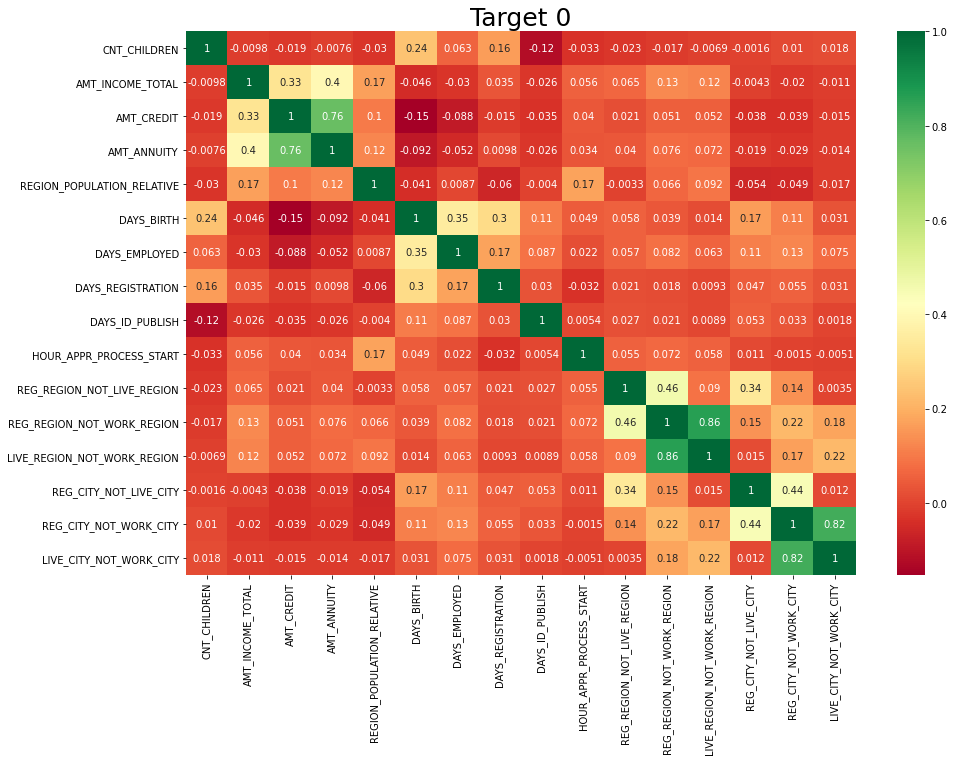

In [47]:
#plotting heatmap for above correlation

plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25

sns.heatmap(target0, cmap="RdYlGn",annot=True)

plt.title("Target 0")
plt.yticks(rotation=0)
plt.show()

###  **Insights from above graph**


1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.

In [48]:
#Find correlation between the numerical columns for Target 1 

application_df_target1_corr = application_df_target1.iloc[0:,2:]
target1=application_df_target1_corr.corr()
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.032019,0.176563,0.032627,0.126411,-0.089861,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.008476,-0.007822,-0.000039,-0.003959,-0.008858,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.069220,-0.189512,-0.106003,-0.033250,-0.062405,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.074406,-0.090497,-0.049032,0.014302,-0.044289,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,1.000000,-0.049958,-0.015758,-0.055746,-0.011965,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017
DAYS_BIRTH,0.176563,-0.007822,-0.189512,-0.090497,-0.049958,1.000000,0.307018,0.241202,0.135519,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044
DAYS_EMPLOYED,0.032627,-0.000039,-0.106003,-0.049032,-0.015758,0.307018,1.000000,0.137454,0.096559,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026
DAYS_REGISTRATION,0.126411,-0.003959,-0.033250,0.014302,-0.055746,0.241202,0.137454,1.000000,0.049891,-0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976
DAYS_ID_PUBLISH,-0.089861,-0.008858,-0.062405,-0.044289,-0.011965,0.135519,0.096559,0.049891,1.000000,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,-0.014871
HOUR_APPR_PROCESS_START,-0.038923,0.012520,0.029054,0.022524,0.144049,0.034990,0.000092,-0.048209,0.008774,1.000000,0.054819,0.067472,0.051844,0.005148,0.005293,0.003297


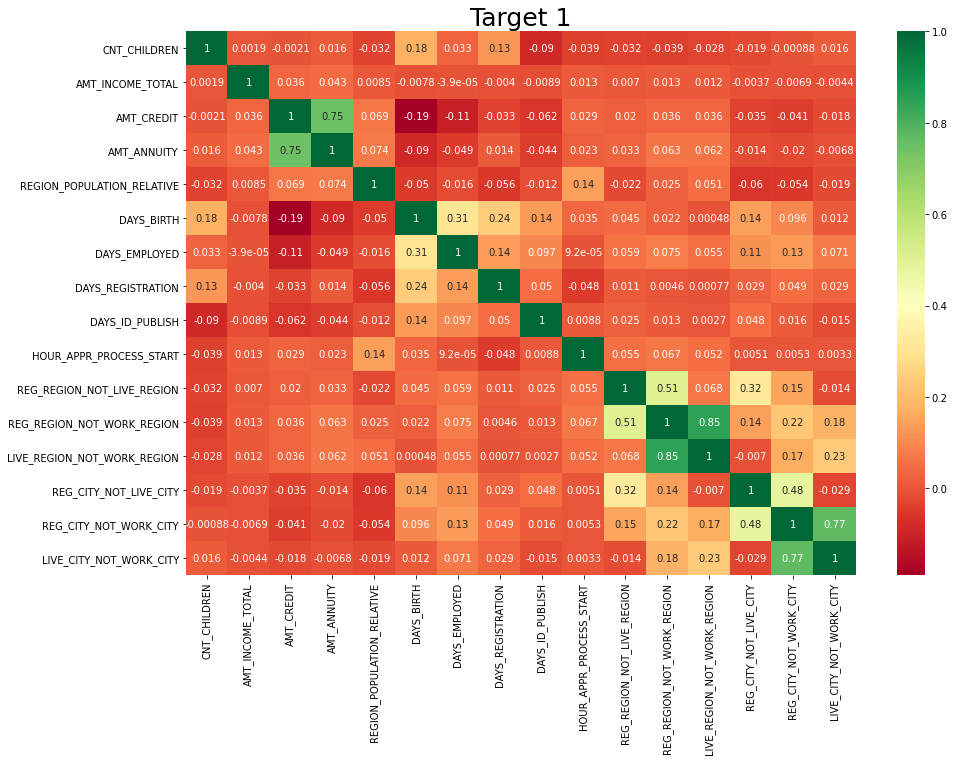

In [49]:
#plotting heatmap for above correlation

plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25

sns.heatmap(target1, cmap="RdYlGn",annot=True)

plt.title("Target 1")
plt.yticks(rotation=0)
plt.show()

###  **Insights from above graph**

1. The client's permanent address does not match contact address are having less children and vice-versa.
2. The client's permanent address does not match work address are having less children and vice-versa.

## PREVIOUS_DATA

This data is about whether the previous application had been Approved, Cancelled, Refused or Unused offer.

#### By taking previous application into consideration for analysis

In [50]:
previous_application_df = pd.read_csv("previous_application.csv")

In [51]:
previous_application_df.shape

(1670214, 37)

In [52]:
#identifying and cleaning the missing values which are greater than 30%

nullColumns = previous_application_df.isnull().sum()
nullColumns=nullColumns[nullColumns.values > (0.3*len(nullColumns))]
len(nullColumns)

15

In [53]:
#removing 15 columns

previous_application_df.drop(labels=list(nullColumns.index),axis=1,inplace=True)

previous_application_df.shape

(1670214, 22)

In [54]:
previous_application_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_APPLICATION                float64
AMT_CREDIT                     float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
NAME_YIELD_GROUP                object
dtype: object

In [55]:
previous_application_df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [56]:
# Removing the column values of 'XNA' and 'XAP'

previous_application_df = previous_application_df[~(previous_application_df['NAME_CASH_LOAN_PURPOSE']=='XNA')]
previous_application_df = previous_application_df[~(previous_application_df['NAME_CASH_LOAN_PURPOSE']=='XAP')]

previous_application_df.shape

(69635, 22)

**MERGING TWO DATAFRAMES**

In [57]:
#merging both the data frames

application_df = pd.merge(left = application_df,right = previous_application_df, how='inner', on = "SK_ID_CURR",suffixes='_x' )
application_df.shape

(51420, 51)

In [58]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START_', 'HOUR_APPR_PROCESS_START_',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPEx', 'AMT_APPLICATION', 'AMT_CREDITx',
       'WEEKDAY_APPR_PROCESS_STARTx', 'HOUR_APPR_PROCESS_STARTx',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       '

In [59]:
application_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_              object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_                     float64
AMT_ANNUITY                     float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
WEEKDAY_APPR_PROCESS_START_      object
HOUR_APPR_PROCESS_START_          int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64


### **Univariate analysis**

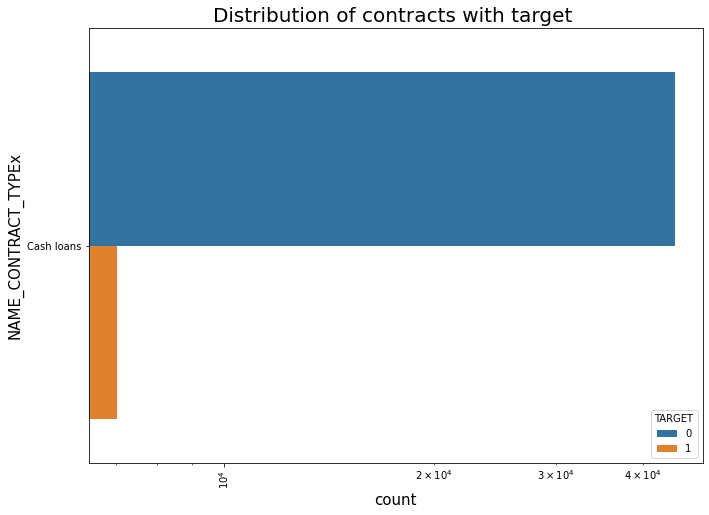

In [60]:
# Distribution of contract status

plt.figure(figsize=(11,8))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20

plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contracts with target ')
ax = sns.countplot(data = application_df, y= 'NAME_CONTRACT_TYPEx', 
                   order=application_df['NAME_CONTRACT_TYPEx'].value_counts().index,hue = 'TARGET')
plt.show()

###  **Insights from above graph**

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Paying other loans and buying a new car is having significant higher rejection than approves.

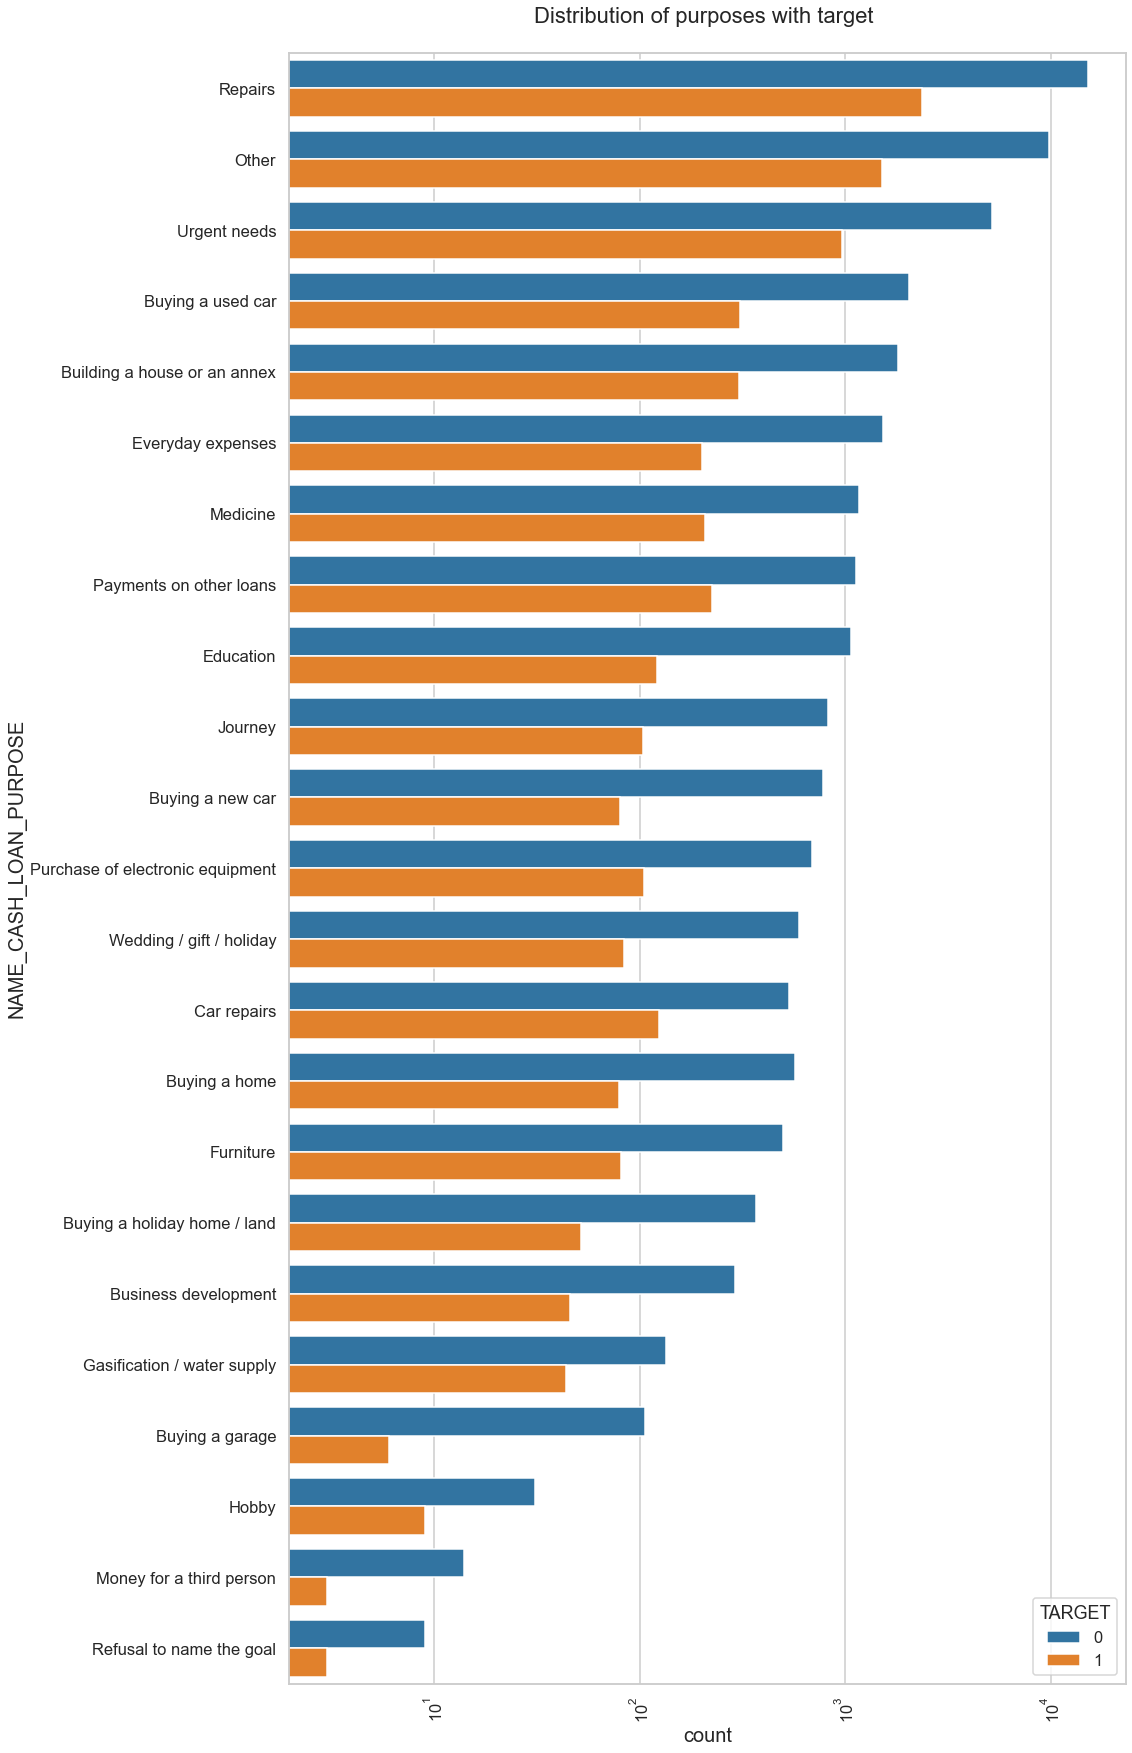

In [61]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data =application_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=application_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 

###  **Insights from above graph**

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.
    They are 'Buying a garage', 'Business development', 'Buying land','Buying a new car' and 'Education'

### **Bivariate analysis**

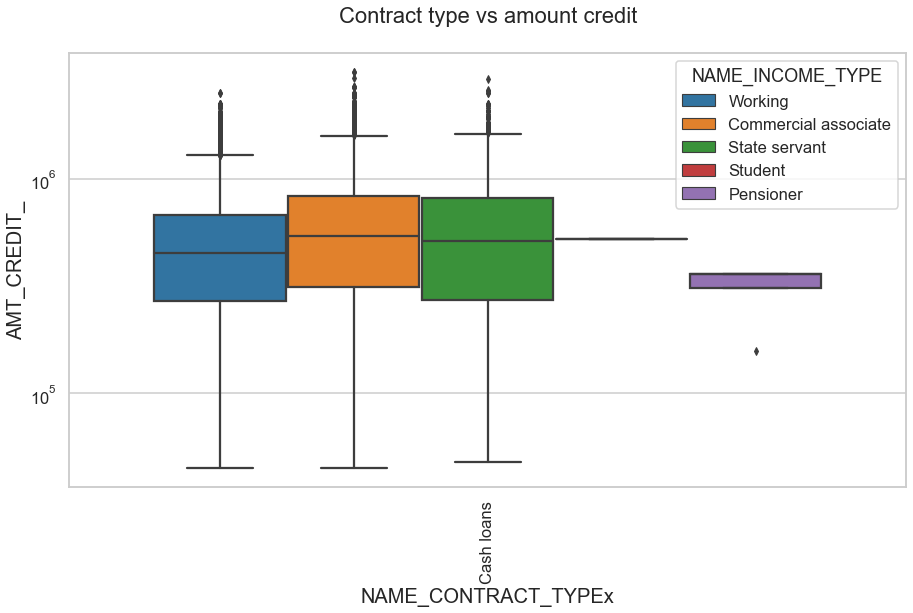

In [62]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data= application_df, x='NAME_CONTRACT_TYPEx',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_',orient='v')
plt.title('Contract type vs amount credit')
plt.show()

###  **Insights from above graph**

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

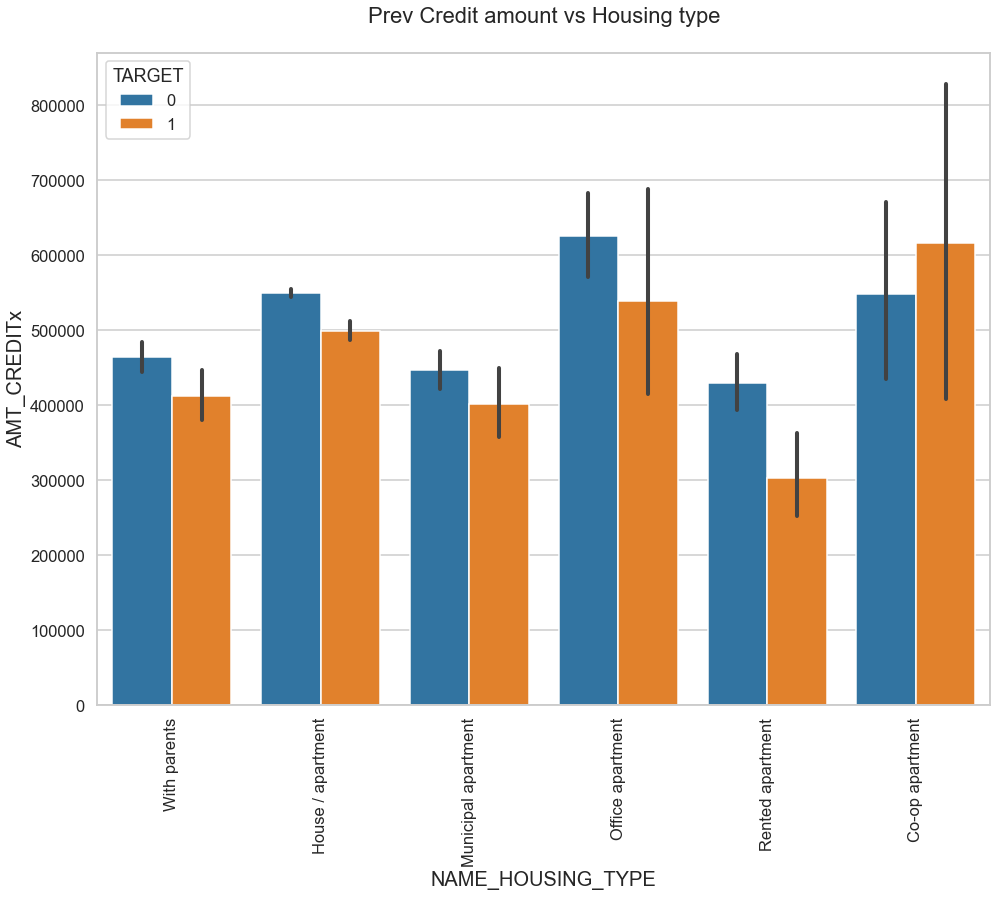

In [63]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =application_df, y='AMT_CREDITx',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

###  **Insights from above graph**

   Here , for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\apartment or municipal apartment for successful payments.

 ## **CONCLUSION**

  1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other
     than ‘Co-op apartment’ for successful payments.
  2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
  3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
  4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.